<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 3.5em;">ESA Soil Moisture Data from Active and Passive<br /><br /> Microwave Satellite Sensors</span>
</div>
<br />

<br />
<span style="color:#444; font-family: 'Arial'; font-size: 1.3em;"> Data taken from: https://www.esrl.noaa.gov/psd/data/gridded/data.cpcsoil.html </span>
<br />

In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import urllib2
from contextlib import closing
from matplotlib.pyplot import cm
import rasterio
import os
import shutil
import netCDF4
%matplotlib inline

In [2]:
remote_path = 'ftp://ftp.cdc.noaa.gov/Datasets/cpcsoil/'
last_file = 'soilw.mon.ltm.v2.nc'

local_path = os.getcwd()

print (remote_path)
print (last_file)
print (local_path)

ftp://ftp.cdc.noaa.gov/Datasets/cpcsoil/
soilw.mon.ltm.v2.nc
/Users/vizzuality/Documents/Vizzuality/RW/planet_pulse/Notebooks


In [3]:
with closing(urllib2.urlopen(remote_path+last_file)) as r:
    with open(last_file, 'wb') as f:
        shutil.copyfileobj(r, f)

In [4]:
ncfile = xr.open_dataset(local_path+'/'+last_file, decode_times=False)

In [5]:
print('* Variables disponibles en el fichero:')
for v in ncfile.variables:
    print(v)

* Variables disponibles en el fichero:
lat
lon
climatology_bounds
time
soilw
valid_yr_count


In [6]:
#Con este comando vemos la info general del fichero .nc 
ncfile.info()

xarray.Dataset {
dimensions:
	lat = 360 ;
	lon = 720 ;
	nbnds = 2 ;
	time = 12 ;

variables:
	float32 lat(lat) ;
		lat:long_name = Latitude ;
		lat:units = degrees_north ;
		lat:actual_range = [ 89.75 -89.75] ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
		lat:coordinate_defines = point ;
	float32 lon(lon) ;
		lon:long_name = Longitude ;
		lon:units = degrees_east ;
		lon:actual_range = [  2.50000000e-01   3.59750000e+02] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
		lon:coordinate_defines = point ;
	float64 climatology_bounds(time, nbnds) ;
		climatology_bounds:long_name = Climate Time Boundaries ;
		climatology_bounds:units = days since 1948-1-1 0:0:0 ;
	float64 time(time) ;
		time:long_name = Time ;
		time:delta_t = 0000-01-00 00:00:00 ;
		time:avg_period = 0000-01-00 00:00:00 ;
		time:standard_name = time ;
		time:axis = T ;
		time:coordinate_defines = start ;
		time:prev_avg_period = 0000-00-01 00:00:00 ;
		time:climatology = climatology_bounds ;
		time:climo_period

In [7]:
#info de la variable precip
ncfile.variables['soilw'][:]

<xarray.Variable (time: 12, lat: 360, lon: 720)>
[3110400 values with dtype=float64]
Attributes:
    long_name:      Model-Calculated Long Term Monthly Mean Soil Moisture
    units:          mm
    dataset:        CPC Monthly Soil Moisture
    var_desc:       Soil Moisture
    level_desc:     Surface
    statistic:      Long Term Mean
    parent_stat:    Other
    standard_name:  lwe_thickness_of_soil_moisture_content
    cell_methods:   time: mean (monthly from values)
    valid_range:    [    0.  1000.]
    actual_range:   [  1.86264515e-06   7.43505005e+02]

<br />
<span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 2.5em;">Visualizing Data</span>
<br />

[u'lat', u'lon', u'climatology_bounds', u'time', u'soilw', u'valid_yr_count']
<type 'netCDF4._netCDF4.Variable'>
float32 soilw(time, lat, lon)
    long_name: Model-Calculated Long Term Monthly Mean Soil Moisture
    missing_value: -9.96921e+36
    units: mm
    dataset: CPC Monthly Soil Moisture
    var_desc: Soil Moisture
    level_desc: Surface
    statistic: Long Term Mean
    parent_stat: Other
    standard_name: lwe_thickness_of_soil_moisture_content
    cell_methods: time: mean (monthly from values)
    scale_factor: 1.0
    add_offset: 0.0
    valid_range: [    0.  1000.]
    actual_range: [  1.86264515e-06   7.43505005e+02]
unlimited dimensions: 
current shape = (12, 360, 720)
filling on, default _FillValue of 9.96920996839e+36 used



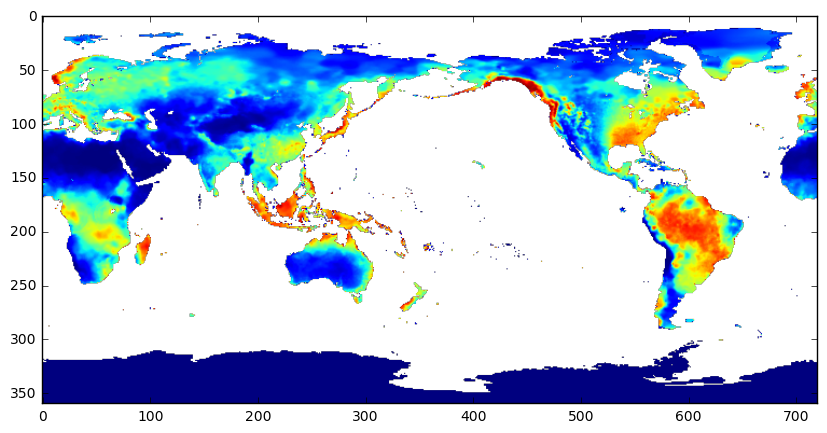

In [8]:
# open a local NetCDF file or remote OPeNDAP URL
url = url=local_path+'/'+last_file
nc = netCDF4.Dataset(url)

# examine the variables
print nc.variables.keys()
print nc.variables['soilw']

# Data from variable of interest
topo = nc.variables['soilw'][1,:,:]

# Ploting
plt.figure(figsize=(10,10))
plt.imshow(topo)

In [9]:
rows, columns = topo.shape              # get sizes
print rows
print columns

360
720


In [10]:
flipped_array = np.fliplr(topo)   # Reverse the array

(360, 720)


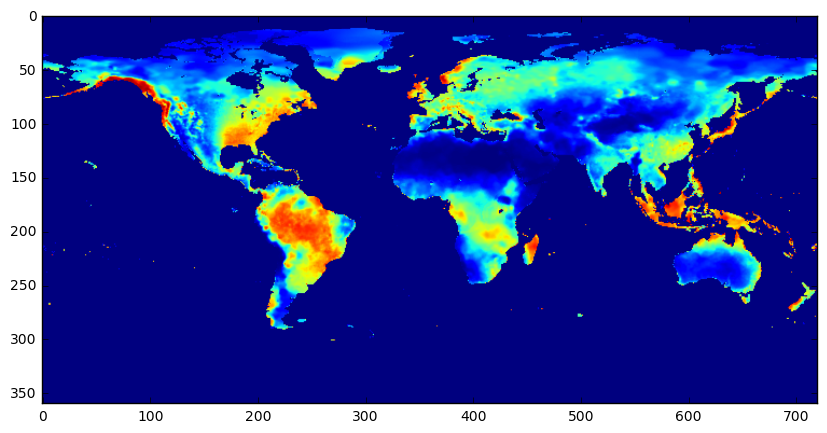

In [13]:
left_side = topo[:,int(columns/2):]     # split the array... 
right_side = topo[:,:int(columns/2)]    # ...into two halves. Then recombine.
wsg84_array = np.concatenate((topo[:,int(columns/2):],topo[:,:int(columns/2)]), axis=1)
print(wsg84_array.shape)                         #  confirm we havent screwed the size of the array
plt.figure(figsize=(10,10))
plt.imshow(wsg84_array, cmap=cm.jet, vmin=1.86264515e-06, vmax=7.43505005e+02)

<br />
<span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 2.5em;">GitHub Script</span>
<br />

In [ ]:
import numpy as np
import os
import urllib2
import shutil
from contextlib import closing
from netCDF4 import Dataset
import rasterio
import tinys3
np.set_printoptions(threshold='nan')

In [ ]:
def dataDownload(): 
    
    remote_path = 'ftp://ftp.cdc.noaa.gov/Datasets/cpcsoil/'
    last_file = 'soilw.mon.ltm.v2.nc'
    local_path = os.getcwd()
    print remote_path
    print last_file
    print local_path

    #Download the file .nc
    with closing(urllib2.urlopen(remote_path+'/'+last_file)) as r:
        with open(str(last_file), 'wb') as f:
            shutil.copyfileobj(r, f)

    ncfile = Dataset(local_path+'/'+last_file)
    
    return last_file

In [ ]:
def netcdf2tif(dst,outFile):
    nc = Dataset(dst)
    data = nc['soilw'][1,:,:]
            
    data[data < 0] = -1
    data[data > 1000] = -1
    
    print data
    
    # Return lat info
    south_lat = -89.75
    north_lat = 89.75

    # Return lon info
    west_lon = 0.25
    east_lon = 359.75
    
    
    rows, columns = data.shape              # get sizes
    print rows
    print columns
    flipped_array = np.fliplr(data)
    left_side = data[:,int(columns/2):]     # split the array... 
    right_side = data[:,:int(columns/2)]    # ...into two halves. Then recombine.
    wsg84_array = np.concatenate((data[:,int(columns/2):],data[:,:int(columns/2)]), axis=1)
    
    
    # Transformation function
    transform = rasterio.transform.from_bounds(west_lon, south_lat, east_lon, north_lat, data.shape[1], data.shape[0])
    # Profile
    profile = {
        'driver':'GTiff', 
        'height':data.shape[0], 
        'width':data.shape[1], 
        'count':1, 
        'dtype':np.float64, 
        'crs':'EPSG:4326', 
        'transform':transform, 
        'compress':'lzw', 
        'nodata': -1
    }
    with rasterio.open(outFile, 'w', **profile) as dst:
        dst.write(data.astype(profile['dtype']), 1)
    
    print 'Data Shape: ',data.shape[1]
    print 'Data Shape: ',data.shape[0]

In [ ]:
def s3Upload(outFile):
    # Push to Amazon S3 instance
    conn = tinys3.Connection(os.getenv('S3_ACCESS_KEY'),os.getenv('S3_SECRET_KEY'),tls=True)
    f = open(outFile,'rb')
    conn.upload(outFile,f,os.getenv('BUCKET'))

In [ ]:
# Execution
outFile ='soil_moisture.tif'
print 'starting'
file = dataDownload()
print 'downloaded'
netcdf2tif(file,outFile)
print 'converted'
#s3Upload(outFile)
print 'finish'